# Linear Modeling of Filler Percentage

In [1]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression

In [2]:
from collections import defaultdict
from tabulate import tabulate
from IPython.core.display import HTML

In [3]:
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
df = pd.read_csv('tan delta study_v2 - master.csv', index_col='folderID')

In [5]:
df.loc[55]

,matrix,filler,Unnamed: 3,filler percentage,"x2 (matrix type, or filler density, or chemical)",x3,Tg,tan delta peak,half width,E' (35 C) (MPa),E' (130 C) (MPa)
folderID,,,,,,,,,,,
55,"polyamide-6,6",silica,NaN,0.0,NaN,NaN,25.156791,0.064312,87.101042,NaN,NaN
55,"polyamide-6,6",silica,NaN,1.0,NaN,NaN,24.222013,0.061385,97.422232,NaN,NaN
55,"polyamide-6,6",silica,NaN,10.0,NaN,NaN,22.865149,0.058908,85.920678,NaN,NaN
55,"polyamide-6,6",silica,NaN,3.0,NaN,NaN,25.156791,0.060997,66.588564,NaN,NaN
55,"polyamide-6,6",silica,NaN,5.0,NaN,NaN,34.792957,0.073947,71.797637,NaN,NaN


In [6]:
problematic_folder_ids = [27]  # 27 excluded manually here

In [7]:
# picking out problematic folder IDs
for folder_id in set(df.index.values):
    problematic = False
    curr = df.loc[folder_id]
    if not 0.0 in list(curr['filler percentage']):
        print(folder_id, 'miss zero filler percentage')
        problematic = True
    if curr['tan delta peak'].isnull().any():
        print(folder_id, 'miss tan delta peak data')
        problematic = True
    min_tg_row = curr[curr['filler percentage'] == 0.0]
    if not len(min_tg_row) == 1:
        print(folder_id, 'min filler percentage has', len(min_tg_row), 'values')
        problematic = True
    if problematic:
        problematic_folder_ids.append(folder_id)

5 miss tan delta peak data
6 min filler percentage has 2 values
7 miss zero filler percentage
7 min filler percentage has 0 values
11 min filler percentage has 2 values
12 min filler percentage has 2 values
15 min filler percentage has 4 values
36 min filler percentage has 2 values
40 min filler percentage has 2 values
45 min filler percentage has 2 values
47 min filler percentage has 2 values
57 min filler percentage has 2 values
58 min filler percentage has 2 values
76 min filler percentage has 2 values
83 miss zero filler percentage
83 min filler percentage has 0 values


In [8]:
df.drop(index=problematic_folder_ids, inplace=True)

In [9]:
def tg_make_features(folder_df):
    # subtract min tg
    min_tg_row = folder_df[folder_df['filler percentage'] == 0.0]
    assert not min_tg_row.empty
    assert len(min_tg_row) == 1
    folder_df['tan delta peak'] -= min_tg_row['tan delta peak']
    # make x and y
    x = folder_df[['filler percentage']].values
    y = folder_df['tan delta peak'].values
    return x, y

In [10]:
def run_lr(x, y):
    reg = LinearRegression()
    reg.fit(x, y)
    return (reg.score(x, y), mse(reg.predict(x), y), reg.coef_[0], reg.intercept_,)

In [11]:
def mse(a1, a2):
    return ((a1 - a2) ** 2).mean()

In [12]:
results = defaultdict(None)

In [13]:
# run LR for each folderID
for folder_id in set(df.index.values):
    x, y = tg_make_features(df.loc[folder_id].copy())
    results[folder_id] = run_lr(x, y)

In [14]:
result_table = []
headers = ['folderID', 'matrix', 'filler', 'R^2', 'MSE', 'coeff', 'intercept']
for folder_id, lr_results in results.items():
    rows = df.loc[folder_id]
    result_table.append([folder_id, rows['matrix'].any(), rows['filler'].any()] + [item for item in lr_results])

In [15]:
# HTML(tabulate(result_table, headers=headers, tablefmt="html"))

(1) diff_Tg/diff_tan_delta_peak vs. filler content, (2) coefficient vs. paper ID with corresponding matrix+filler type to the right, (3) coefficient vs. filler type with filler type to the right, (4) coefficient vs. matrix type with matrix type to the right, (5) MSE/R^2 vs. with corresponding matrix+filler type to the right, (6) MSE/R^2 vs. with corresponding matrix type to the right, (7) MSE/R^2 vs. with corresponding filler type to the right. For each of these plots, if outliers exist, generate two plots with/without outliers, also include matrix+filler, matrix, and filler info to the right (so that would be again 6 plots).
 
Please generate plots according to the notes below as I’ve suggested for her.
1.       Always include matrix+filler names to the right/at the bottom for reference.
2.       If there are outliers, take them out and replot the non-outliers. Since with the outliers, the scale will be messed up and we cannot see the “normal” points’ data clearly.
3.       Always record the outliers, plot them in a separate plot if there are more than 3 outliers.
4.       Please state the y-axis, x-axis clearly.

In [16]:
res_df = pd.DataFrame(result_table, columns=headers)
res_df.set_index('folderID', inplace=True)

In [17]:
res_df

,matrix,filler,R^2,MSE,coeff,intercept
folderID,,,,,,
1,bisphenol A PC,MWCNT,0.740091,8.325782e-02,-0.143957,-4.332709e-01
2,EPDM,PANI-organoclay,0.250645,1.253665e-03,-0.001448,-2.267866e-02
3,epoxy,Na-montmorillonite,0.754379,7.536361e-05,-0.004870,3.897393e-03
4,SC-15 epoxy,SWCNT,0.116197,6.499622e-03,0.167077,1.387779e-17
8,DGEBA,graphene platelet,0.463614,6.780087e-03,-0.043997,-7.032007e-02
9,PC,graphene,0.843935,2.830265e-02,-0.509481,-3.048908e-01
10,epoxy,graphene oxide,0.383309,1.548951e-03,-0.018779,-9.710986e-02
13,Ethylene vinyl acetate rubber,organo-MMT,0.992816,2.708306e-04,-0.077559,7.618079e-03
14,PVC,CaCO3,0.076030,9.442927e-04,-0.003154,-2.308300e-02


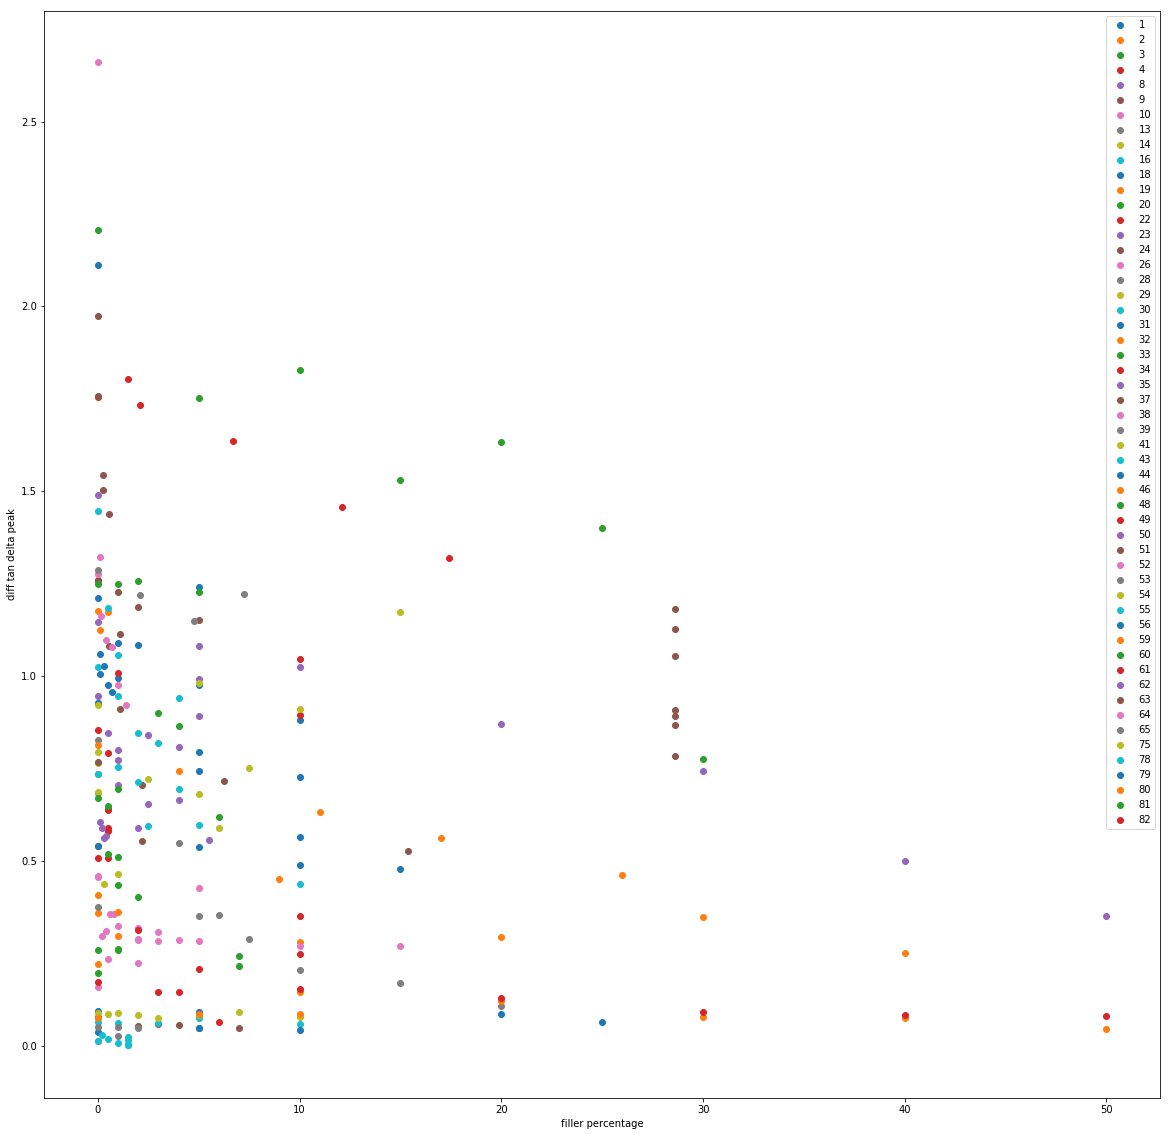

In [18]:
# diff_Tg/diff_tan_delta_peak vs. filler content
plt.figure(figsize=(20,20))
fids = list(set(df.index.values))
for folder_id in fids:
    folder_df = df.loc[folder_id]
    x = folder_df['filler percentage'].values
    y = folder_df['tan delta peak'].values
    plt.scatter(x, y)
#     xy = list(zip(*sorted(list(zip(x, y)), key=lambda p:p[0])))
#     plt.plot(xy[0], xy[1])
plt.legend(fids)
plt.xlabel('filler percentage')
plt.ylabel('diff tan delta peak')
plt.show()

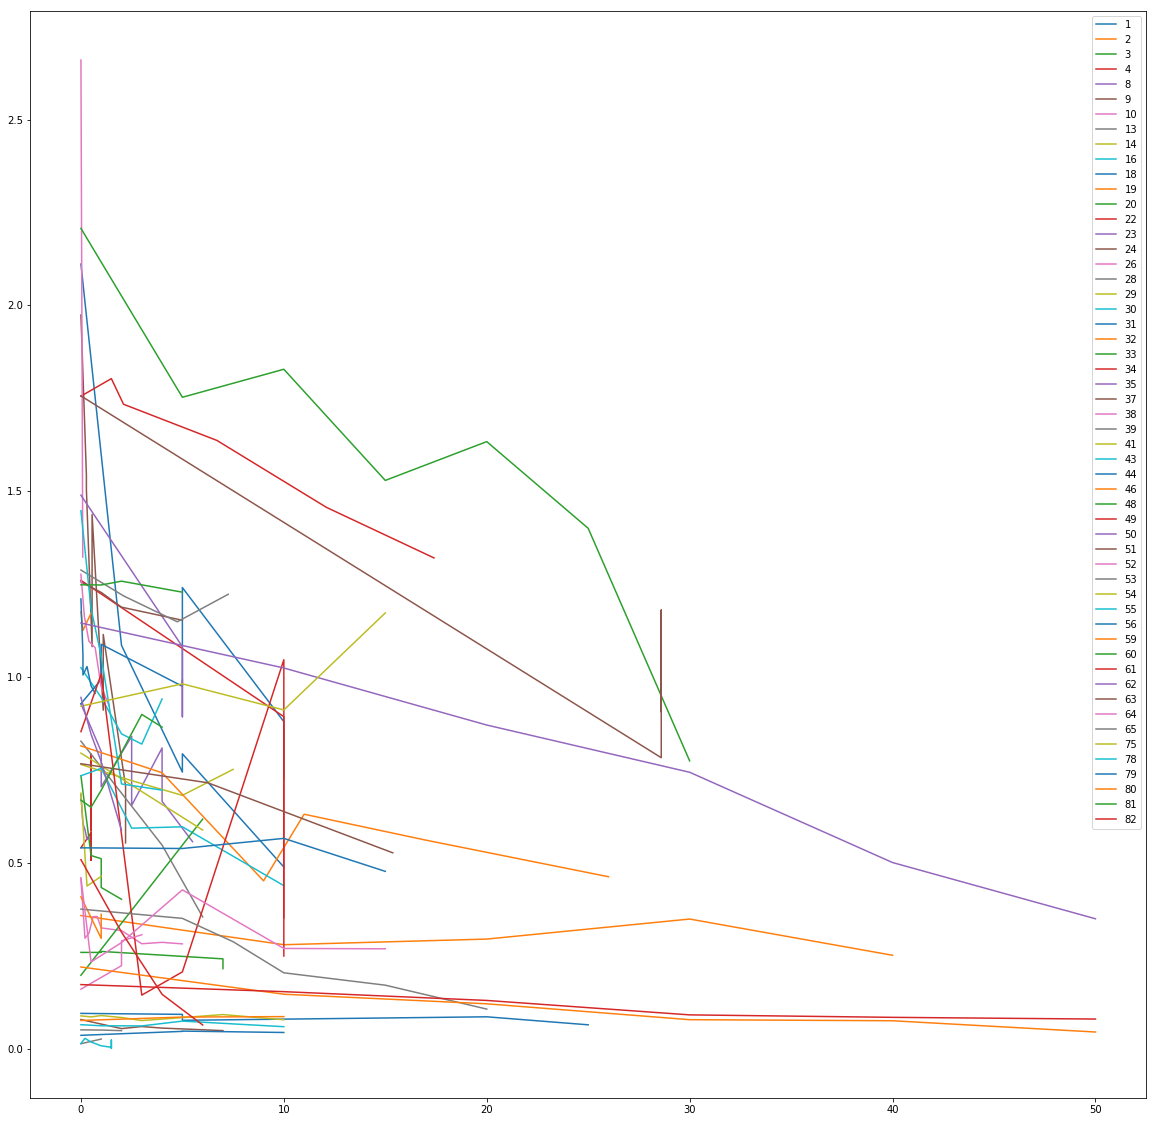

In [19]:
# diff_Tg/diff_tan_delta_peak vs. filler content
plt.figure(figsize=(20,20))
fids = list(set(df.index.values))
for folder_id in fids:
    folder_df = df.loc[folder_id]
    x = folder_df['filler percentage'].values
    y = folder_df['tan delta peak'].values
    xy = list(zip(*sorted(list(zip(x, y)), key=lambda p:p[0])))
    plt.plot(xy[0], xy[1])
plt.legend(fids)
plt.show()

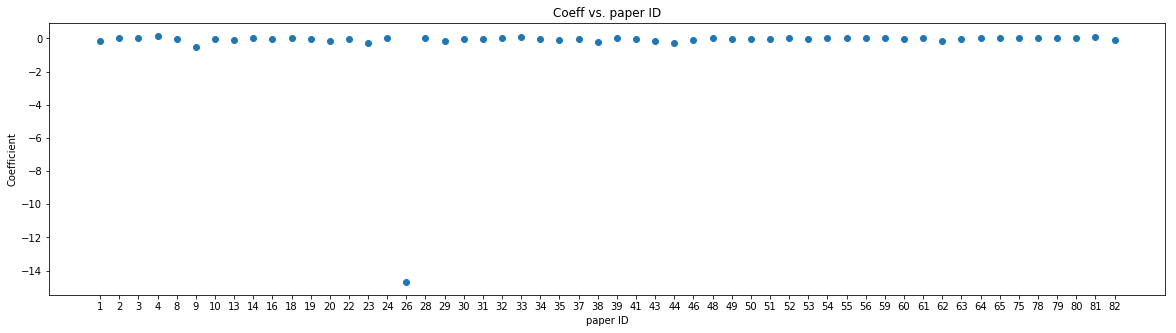

In [20]:
# coefficient vs. paper ID with corresponding matrix+filler type to the right
series = res_df['coeff'].values
plt.figure(figsize=(20,5))
plt.scatter(range(len(series)), series)
plt.xticks(ticks=range(len(series)), labels=res_df.index)
plt.title('Coeff vs. paper ID')
plt.xlabel('paper ID')
plt.ylabel('Coefficient')
plt.show()

In [21]:
# coefficient vs. filler type with filler type to the right


In [22]:
# coefficient vs. matrix type with matrix type to the right,

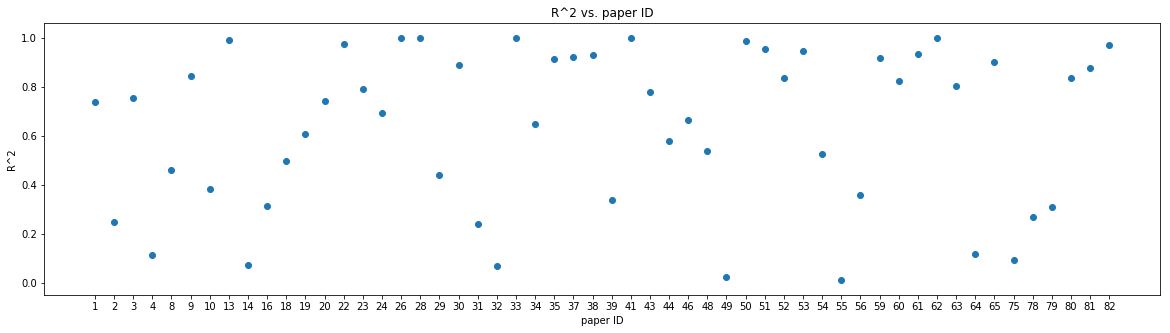

In [23]:
# MSE/R^2 vs. with corresponding matrix+filler type to the right
series = res_df['R^2'].values
plt.figure(figsize=(20,5))
plt.scatter(range(len(series)), series)
plt.xticks(ticks=range(len(series)), labels=res_df.index)
plt.title('R^2 vs. paper ID')
plt.xlabel('paper ID')
plt.ylabel('R^2')
plt.show()

In [24]:
good_lines = res_df[res_df['R^2'] > 0.75]

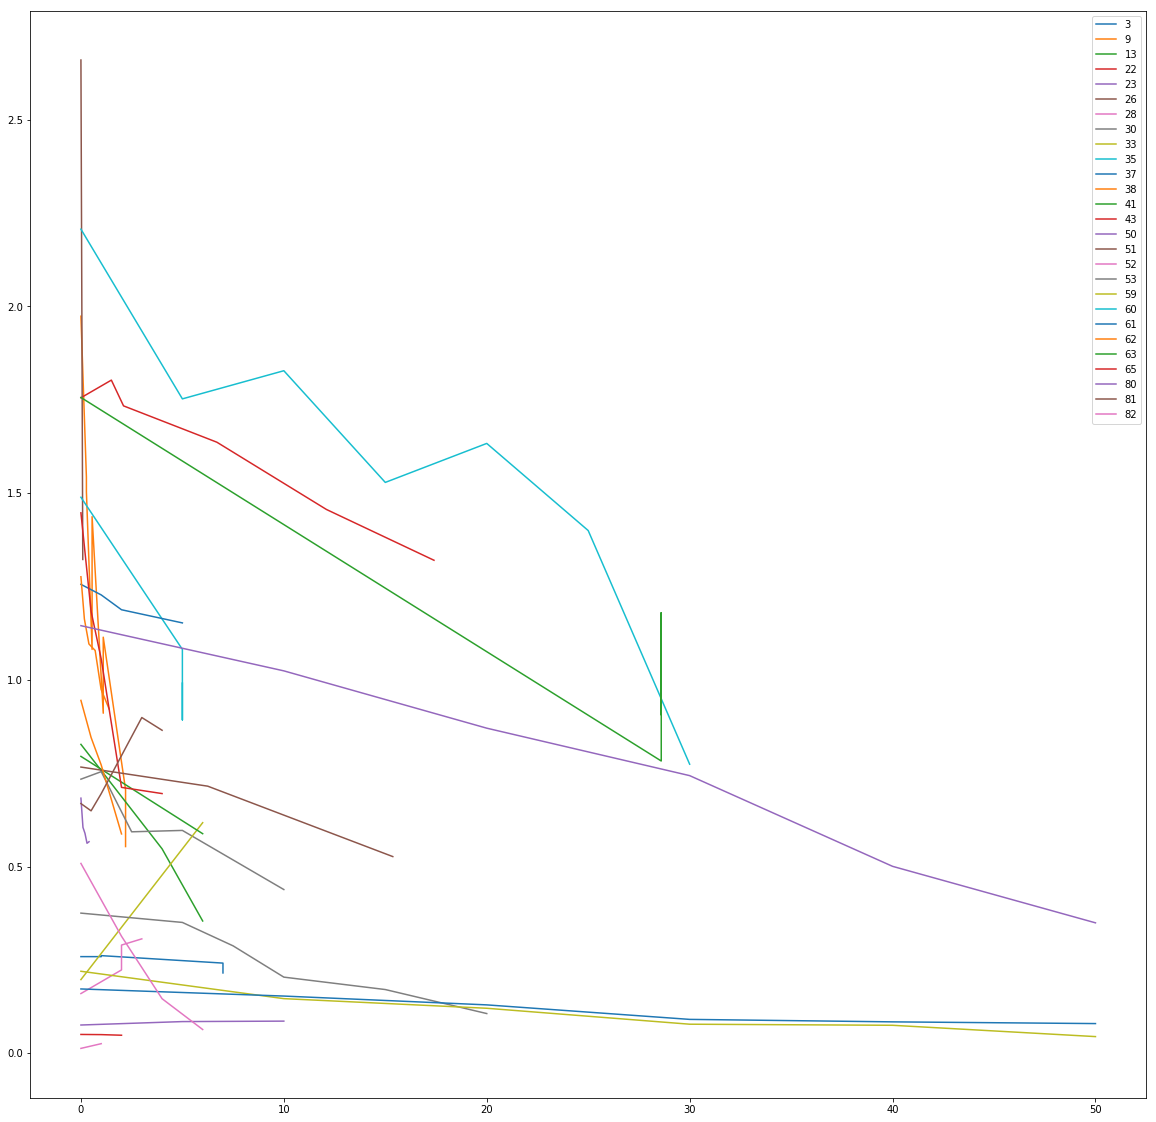

In [25]:
plt.figure(figsize=(20,20))
fids = list(set(good_lines.index.values))
for folder_id in fids:
    folder_df = df.loc[folder_id]
    x = folder_df['filler percentage'].values
    y = folder_df['tan delta peak'].values
    xy = list(zip(*sorted(list(zip(x, y)), key=lambda p:p[0])))
    plt.plot(xy[0], xy[1])
plt.legend(fids)
plt.show()

In [26]:
# MSE/R^2 vs. with corresponding matrix type to the right

In [27]:
# MSE/R^2 vs. with corresponding filler type to the right.